### Emotion Classification for Tweets

In [1]:
# Installing the Emoji
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 3.4 MB/s eta 0:00:00


### Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

In [2]:
# File paths
test_path = '/content/emotion-labels-test.csv'
train_path = '/content/emotion-labels-train.csv'
validatiom_path = '/content/emotion-labels-val.csv'

In [3]:
# loading the datasets
test_df = pd.read_csv(test_path)
train_df = pd.read_csv(train_path)
validation_df = pd.read_csv(validatiom_path)

In [4]:
# Display basic information about the datasets

print("Test Dataset:")
print(test_df.info())

print("\nTrain Dataset:")
print(train_df.info())

print("\nValidation Dataset:")
print(validation_df.info())

Test Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3142 non-null   object
 1   label   3142 non-null   object
dtypes: object(2)
memory usage: 49.2+ KB
None

Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3613 non-null   object
 1   label   3613 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB
None

Validation Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    347 non-null    object
 1   label   347 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB
None


In [5]:
# Preview the dataset

print("Testing Data Preview:")
print(test_df.head(), "\n")

print("Training Data Preview:")
print(train_df.head(), "\n")

print("Validation Data Preview:")
print(validation_df.head(), "\n")

Testing Data Preview:
                                                text label
0  You must be knowing #blithe means (adj.)  Happ...   joy
1  Old saying 'A #smile shared is one gained for ...   joy
2  Bridget Jones' Baby was bloody hilarious 😅 #Br...   joy
3  @Elaminova sparkling water makes your life spa...   joy
4  I'm tired of everybody telling me to chill out...   joy 

Training Data Preview:
                                                text label
0  Just got back from seeing @GaryDelaney in Burs...   joy
1  Oh dear an evening of absolute hilarity I don'...   joy
2  Been waiting all week for this game ❤️❤️❤️ #ch...   joy
3  @gardiner_love : Thank you so much, Gloria! Yo...   joy
4  I feel so blessed to work with the family that...   joy 

Validation Data Preview:
                                                text label
0  @theclobra lol I thought maybe, couldn't decid...   joy
1  Nawaz Sharif is getting more funnier than @kap...   joy
2  Nawaz Sharif is getting more funnier t

In [6]:
# Checking the data type and missing values for all datasets

print("Testing Data Info:")
print(test_df.info(), "\n")

print("Training Data Info:")
print(train_df.info(), "\n")

print("Validation Data Info:")
print(validation_df.info(), "\n")

Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3142 non-null   object
 1   label   3142 non-null   object
dtypes: object(2)
memory usage: 49.2+ KB
None 

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3613 entries, 0 to 3612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3613 non-null   object
 1   label   3613 non-null   object
dtypes: object(2)
memory usage: 56.6+ KB
None 

Validation Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    347 non-null    object
 1   label   347 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB
None 



In [7]:
# Summarizing the missing values

print("Testing Data Missing Values:")
print(test_df.isnull().sum(), "\n")

print("Training Data Missing Values:")
print(train_df.isnull().sum(), "\n")

print("Validation Data Missing Values:")
print(validation_df.isnull().sum(), "\n")

Testing Data Missing Values:
text     0
label    0
dtype: int64 

Training Data Missing Values:
text     0
label    0
dtype: int64 

Validation Data Missing Values:
text     0
label    0
dtype: int64 



In [9]:
# Checking for duplicate rows

print("Testing Data Duplicate Rows:")
print(test_df.duplicated().sum(), "\n")

print("Training Data Duplicate Rows:")
print(train_df.duplicated().sum(), "\n")

print("Validation Data Duplicate Rows:")
print(validation_df.duplicated().sum(), "\n")

Testing Data Duplicate Rows:
0 

Training Data Duplicate Rows:
0 

Validation Data Duplicate Rows:
0 



In [10]:
# Data cleaning

train_df['text'].fillna('', inplace=True)
train_df['label'].fillna('unknown', inplace=True)

validation_df['text'].fillna('', inplace=True)
validation_df['label'].fillna('unknown', inplace=True)

test_df['text'].fillna('', inplace=True)
test_df['label'].fillna('unknown', inplace=True)

<ipython-input-10-883245754eb1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['text'].fillna('', inplace=True)
<ipython-input-10-883245754eb1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [11]:
# Converting columns to correct data types

train_df['label'] = train_df['label'].astype('category')
validation_df['label'] = validation_df['label'].astype('category')
test_df['label'] = test_df['label'].astype('category')

In [12]:
# Rechecking for missing values and duplicates

print("Post-Cleaning Summary:")
print("Testing Data Missing Values:\n", test_df.isnull().sum())
print("Training Data Missing Values:\n", train_df.isnull().sum())
print("Validation Data Missing Values:\n", validation_df.isnull().sum())

print("Duplicate Rows in Testing Data:", test_df.duplicated().sum())
print("Duplicate Rows in Training Data:", train_df.duplicated().sum())
print("Duplicate Rows in Validation Data:", validation_df.duplicated().sum())

Post-Cleaning Summary:
Testing Data Missing Values:
 text     0
label    0
dtype: int64
Training Data Missing Values:
 text     0
label    0
dtype: int64
Validation Data Missing Values:
 text     0
label    0
dtype: int64
Duplicate Rows in Testing Data: 0
Duplicate Rows in Training Data: 0
Duplicate Rows in Validation Data: 0


### Observations and Actions Taken:

***Data Types:***

**_The text column was already in string format. No changes needed._**

**_The label column was converted to the category type for efficiency._**

***Missing Values:***

**_No Missing text entries was found in the three datasets._**

**_No Missing labels were replaced on the datasets_**

***Duplicates:***

**_Duplicate rows was checked on the testing, training and validation data to confirmed that, I printed the duplicate and 0 was shown for all._**

**_These steps ensure the dataset is clean and ready for preprocessing and modeling._**

### Move the Labels into separate DataFrame

In [13]:
# Separating labels into a new DataFrame
test_labels = test_df['label']
train_labels = train_df['label']
validation_labels = validation_df['label']

In [14]:
# Dropping labels from the original DataFrames
test_df = test_df.drop(columns=['label'])
train_df = train_df.drop(columns=['label'])
validation_df = validation_df.drop(columns=['label'])

In [15]:
# Confirm separation
print("Test labels shape:", test_labels.shape)
print("Train labels shape:", train_labels.shape)
print("Validation labels shape:", validation_labels.shape)

Test labels shape: (3142,)
Train labels shape: (3613,)
Validation labels shape: (347,)


### Encode Labels Using LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

In [18]:
# Fitting and transforming the labels
fitter = label_encoder.fit(train_labels)

test_labels_encoded = label_encoder.transform(test_labels)
train_labels_encoded = label_encoder.fit_transform(train_labels)
validation_labels_encoded = label_encoder.transform(validation_labels)

In [19]:
# Reshape labels into 2D arrays
test_labels_encoded = test_labels_encoded.reshape(-1, 1)
train_labels_encoded = train_labels_encoded.reshape(-1, 1)
validation_labels_encoded = validation_labels_encoded.reshape(-1, 1)

In [20]:
# Confirm reshaping
print("Test labels shape:", test_labels_encoded.shape)
print("Train labels shape:", train_labels_encoded.shape)
print("Validation labels shape:", validation_labels_encoded.shape)

Test labels shape: (3142, 1)
Train labels shape: (3613, 1)
Validation labels shape: (347, 1)


### Label Mapping

In [21]:
# Get the mapping of labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

In [22]:
# Display the label mapping
print("Label Mapping:", label_mapping)

Label Mapping: {'anger': 0, 'fear': 1, 'joy': 2, 'sadness': 3}


### Label Encoding Observations

_The labels were successfully separated into a new DataFrame for each dataset (training, validation, testing)._

_Using LabelEncoder, the following mappings were created between string labels and integers:
`{ 'anger': 0, 'fear': 1, 'joy': 2, 'sadness': 3 }`._

_Labels were reshaped into 2D arrays to ensure compatibility with models_

### Combine Labels and Create a Bar Plot

In [23]:
# Combine all labels into one DataFrame for analysis
all_labels = pd.concat([pd.Series(train_labels), pd.Series(validation_labels), pd.Series(test_labels)], axis=0)

In [24]:
# Count the number of occurrences for each category
label_counts = all_labels.value_counts().reset_index()
label_counts.columns = ['Category', 'Count']

<ipython-input-25-7ad1086b8970>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=label_counts, x='Category', y='Count', palette='viridis')


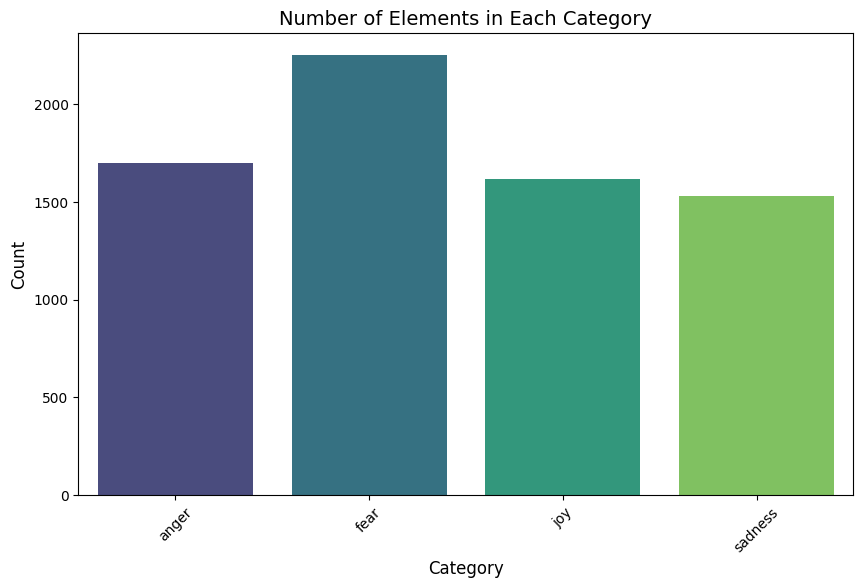

In [25]:
# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts, x='Category', y='Count', palette='viridis')
plt.title('Number of Elements in Each Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

#### Comment on how well balanced the Dataset is:

_The above bar plot reveals how imbalanced the dataset is as `fear` category has more significant samples than others in the dataset._

_The impact of an imbalanced dataset might result in poor performance for underrepresented categories due to insufficient training samples._

### Tokenize each tweet into words

In [26]:
import nltk
from nltk.tokenize import word_tokenize

In [27]:
# Download necessary NLTK data
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
# Tokenization function
def tokenize_tweets(df):
    df['tokens'] = df['text'].apply(lambda x: word_tokenize(x))
    return df

# Tokenizing tweets in all datasets
test_df = tokenize_tweets(test_df)
train_df = tokenize_tweets(train_df)
validation_df = tokenize_tweets(validation_df)

In [29]:
test_df.head()

,text,tokens
0,You must be knowing #blithe means (adj.) Happ...,"[You, must, be, knowing, #, blithe, means, (, ..."
1,Old saying 'A #smile shared is one gained for ...,"[Old, saying, ', A, #, smile, shared, is, one,..."
2,Bridget Jones' Baby was bloody hilarious 😅 #Br...,"[Bridget, Jones, ', Baby, was, bloody, hilario..."
3,@Elaminova sparkling water makes your life spa...,"[@, Elaminova, sparkling, water, makes, your, ..."
4,I'm tired of everybody telling me to chill out...,"[I, 'm, tired, of, everybody, telling, me, to,..."


### Use Speller from the Autocorrect Library to correct spelling mistakes

In [ ]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 27.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=bc99e9841ef83a1b708597dd56a7616ff08bf54f61c39fb9e3ab86f625f9317a
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [ ]:
from autocorrect import Speller

In [ ]:
# Initialize Speller
speller = Speller(lang='en')

In [ ]:
# Function to correct spelling mistakes
def correct_spelling(tokens):
    return [speller(word) for word in tokens]

In [ ]:
# Apply spelling correction
test_df['tokens'] = test_df['tokens'].apply(correct_spelling)
train_df['tokens'] = train_df['tokens'].apply(correct_spelling)
validation_df['tokens'] = validation_df['tokens'].apply(correct_spelling)

### Creating a List of Stopwords

In [30]:
from nltk.corpus import stopwords

In [31]:
# Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

In [33]:
# Function to remove stopwords
def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

In [34]:
# Apply stopword removal
test_df['tokens'] = test_df['tokens'].apply(remove_stopwords)
train_df['tokens'] = train_df['tokens'].apply(remove_stopwords)
validation_df['tokens'] = validation_df['tokens'].apply(remove_stopwords)

### Lemmatization

In [35]:
from nltk.stem import WordNetLemmatizer

In [36]:
# Download WordNet data
nltk.download('wordnet')

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to apply lemmatization
def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# Apply lemmatization
test_df['tokens'] = test_df['tokens'].apply(apply_lemmatization)
train_df['tokens'] = train_df['tokens'].apply(apply_lemmatization)
validation_df['tokens'] = validation_df['tokens'].apply(apply_lemmatization)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Additional Text Cleanup Using Regular Experssions (re)

In [37]:
import re

In [38]:
# Function to clean text
def clean_text(tokens):
    cleaned_tokens = []
    for word in tokens:
        # Remove non-alphanumeric characters
        word = re.sub(r'\W+', '', word)
        # Remove URLs
        word = re.sub(r'http\S+|www\S+', '', word)
        if word:  # Exclude empty strings after cleanup
            cleaned_tokens.append(word)
    return cleaned_tokens


In [39]:
# Apply text cleanup
test_df['tokens'] = test_df['tokens'].apply(clean_text)
train_df['tokens'] = train_df['tokens'].apply(clean_text)
validation_df['tokens'] = validation_df['tokens'].apply(clean_text)

### Print out the words in the first five preprocessed tweets along with their labels

In [40]:
# Display the words in the first five processed tweets along with their labels
test_df['tokens']

,tokens
0,"[must, knowing, blithe, mean, adj, Happy, chee..."
1,"[Old, saying, smile, shared, one, gained, anot..."
2,"[Bridget, Jones, Baby, bloody, hilarious, Brid..."
3,"[Elaminova, sparkling, water, make, life, spar..."
4,"[m, tired, everybody, telling, chill, everythi..."
...,...
3137,"[Candice, constantly, pout, GBBO]"
3138,"[redBus_in, unhappy, redbus, CC, talked, week,..."
3139,"[AceOperative789, pull, afew, week, ago, sadly..."
3140,"[m, buying, art, supply, m, debating, serious,..."


In [41]:
# Display the first 5 processed tweets with their labels
for i in range(5):
    print(f"Processed Tweet {i + 1}: {train_df['tokens'].iloc[i]}")
    print(f"Label: {train_labels.iloc[i]}")
    print("-" * 50)

Processed Tweet 1: ['got', 'back', 'seeing', 'GaryDelaney', 'Burslem', 'AMAZING', 'Face', 'still', 'hurt', 'laughing', 'much', 'hilarious']
Label: joy
--------------------------------------------------
Processed Tweet 2: ['Oh', 'dear', 'evening', 'absolute', 'hilarity', 'nt', 'think', 'laughed', 'much', 'long', 'time']
Label: joy
--------------------------------------------------
Processed Tweet 3: ['waiting', 'week', 'game', 'cheer', 'friday']
Label: joy
--------------------------------------------------
Processed Tweet 4: ['gardiner_love', 'Thank', 'much', 'Gloria', 're', 'sweet', 'thoughtful', 'made', 'day', 'joyful', 'love']
Label: joy
--------------------------------------------------
Processed Tweet 5: ['feel', 'blessed', 'work', 'family', 'nanny', 'nothing', 'love', 'amp', 'appreciation', 'make', 'smile']
Label: joy
--------------------------------------------------


### Histogram of Sequence Lengths after Preprocessing

In [42]:
# Compute sequence lengths for the training data
sequence_lengths = train_df['tokens'].apply(lambda x: len(x))

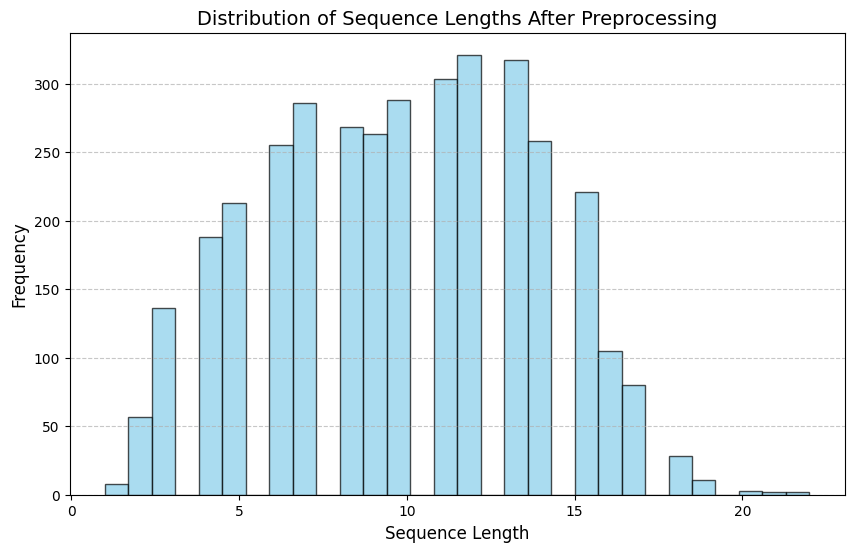

In [43]:
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sequence Lengths After Preprocessing', fontsize=14)
plt.xlabel('Sequence Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Comment on Maximum Length Hyperparameter

_The histogram shows the distribution of sequence lengths after preprocessing and most tweets fall within a specific range 5-15 words_

_The choice of maximum length is critical for padding or truncating sequences to ensure uniform input sizes for the model._

### Analyze Sequence Lengths

In [44]:
# Calculate key percentiles of sequence lengths
percentiles = np.percentile(sequence_lengths, [50, 75, 90, 95, 99])
print(f"Percentiles of Sequence Lengths: {percentiles}")

Percentiles of Sequence Lengths: [10. 13. 15. 16. 18.]


### Apply Truncation/Padding

In [45]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [46]:
# Instantiate a Tokenizer
tokenizer = Tokenizer()

In [47]:
# Fit the tokenizer on the combined text data
all_text = train_df['tokens'].tolist() + validation_df['tokens'].tolist() + test_df['tokens'].tolist()
tokenizer.fit_on_texts(all_text)

In [48]:
# Convert text to sequences of numerical tokens
test_sequences = tokenizer.texts_to_sequences(test_df['tokens'].tolist())
train_sequences = tokenizer.texts_to_sequences(train_df['tokens'].tolist())
validation_sequences = tokenizer.texts_to_sequences(validation_df['tokens'].tolist())

In [49]:
# Define max_length based on analysis (20)
max_length = 20

In [50]:
# Apply Truncation and Padding
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding='post', truncating='post')

In [51]:
# Check the padded sequences
print("Padded Training Sequence Shape:", train_padded.shape)
print("Example Padded Sequence:", train_padded[0])

Padded Training Sequence Shape: (3613, 20)
Example Padded Sequence: [  21   34  385 3744 3745   87  147   29  369  423   45   90    0    0
    0    0    0    0    0    0]


### Observations

**1. Key Percentile Analysis:**

_Based on the percentile calculation, max_length was set to 20, ensuring that most of the information from tweets is retained while avoiding excessive padding._

**2. Uniform Input Sizes:**

**_All sequences are now of uniform length:_**

_Shorter sequences are padded with zeros at the end (padding='post')._

_Longer sequences are truncated after the max_length tokens (truncating='post')._

**3. Model Compatibility:**

**_Uniform sequence lengths are required for input into models like RNNs, LSTMs, or Transformers._**

# Modeling

### Choose a Vocabulary Size

**_The vocabulary size determines the maximum number of unique words in the tokenized sequences._**

**_A common choice is based on the dataset size._**


In [52]:
# Choose vocabulary size
vocab_size = 3613

In [53]:
# Initialize and fit tokenizer on the preprocessed training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")  # "<OOV>" token handles unseen words
tokenizer.fit_on_texts(train_df['tokens'])

In [54]:
# Convert tweets to sequences of index numbers
test_sequences = tokenizer.texts_to_sequences(test_df['tokens'])
train_sequences = tokenizer.texts_to_sequences(train_df['tokens'])
validation_sequences = tokenizer.texts_to_sequences(validation_df['tokens'])

In [55]:
# Apply padding/truncating to sequences
max_length = 20  # I am Using the value chosen in the earlier step
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding='post', truncating='post')

In [56]:
# Inspect results
print("Vocabulary Size:", len(tokenizer.word_index))  # Total number of unique tokens in the tokenizer
print("Example Padded Sequence:", train_padded[0])    # First padded sequence
print("Shape of Padded Training Data:", train_padded.shape)

Vocabulary Size: 9733
Example Padded Sequence: [  27   38  442 2233 2234   41  102   24  328  415   51  109    0    0
    0    0    0    0    0    0]
Shape of Padded Training Data: (3613, 20)


### Model Architecture
**The model includes:**

**Embedding Layer:**  _Converts word indices to dense vectors of fixed size._

**Bidirectional LSTM:**  _Captures sequential dependencies from both directions in the text._

**Dropout Layer:**  _Prevents overfitting by randomly dropping connections during training._

**Dense Layers:**  _Maps learned features to the emotion classes._


In [57]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense, Dropout

In [58]:
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
# Define model hyperparameters
embedding_dim = 64   # Size of word embeddings
lstm_units = 128     # Number of LSTM units
dropout_rate = 0.5   # Dropout rate
output_classes = len(set(train_labels))  # Number of unique labels

In [95]:
# Create the model
model = Sequential([
    # Embedding layer
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),

    # Bidirectional LSTM layer
    Bidirectional(LSTM(lstm_units, return_sequences=False)),

    # Dropout layer
    Dropout(dropout_rate),

    # Fully connected output layer
    Dense(output_classes, activation='softmax')  # Use softmax for multi-class classification
])

In [96]:
# Compile the model
model.compile(
    optimizer='adam',  # Adaptive optimizer
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class labels
    metrics=['accuracy']  # Evaluate performance with accuracy
)

In [97]:
# Convert train_labels to numerical format
if isinstance(train_labels, pd.Series) and train_labels.dtype.name == 'category':
    train_labels = train_labels.cat.codes

In [98]:
# Convert columns in train_padded to numerical format if necessary
if isinstance(train_padded, pd.DataFrame):
    for column in train_padded.select_dtypes(include=['category']).columns:
        train_padded[column] = train_padded[column].cat.codes

In [99]:
# Define hyperparameters for training
batch_size = 32  # Number of samples per batch
epochs = 10      # Number of training epochs

# Train the model
history = model.fit(
    train_padded,       # Training data (padded sequences)
    train_labels,       # Training labels
    batch_size=batch_size,
    epochs=epochs,
    verbose=1           # Print progress during training
)

# Retrieve the final training accuracy
final_training_accuracy = history.history['accuracy'][-1]
print(f"Final Training Accuracy: {final_training_accuracy:.4f}")

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.3285 - loss: 1.3497
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.6264 - loss: 0.8742
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.8761 - loss: 0.3515
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.9436 - loss: 0.1606
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - accuracy: 0.9617 - loss: 0.1045
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9725 - loss: 0.0908
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - accuracy: 0.9756 - loss: 0.0844
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.9744 - loss: 0.0751
Epoch 9/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step - accuracy: 0.9736 - loss: 0.0715
Epoch 10/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.9822 - loss: 0.0536
Final Training Accuracy: 0.9801


In [65]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 20, 64)              │         231,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256)                 │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,289,678 (4.92 MB)

 Trainable params: 429,892 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 859,786 (3.28 MB)

### The Predictions on Validation Data

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing

In [69]:
le = preprocessing.LabelEncoder()
validation_labels_encoded = le.fit_transform(validation_labels)

In [67]:
# Make predictions on the validation data
val_predictions = model.predict(validation_padded)
val_predicted_labels = val_predictions.argmax(axis=1)  # Convert probabilities to class indices

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [68]:
# Calculate validation accuracy
validation_accuracy = model.evaluate(validation_padded, validation_labels_encoded)[1]
print(f"Validation Accuracy: {validation_accuracy:.4f}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8169 - loss: 0.6384
Validation Accuracy: 0.8300


### Validation Accuracy

**_The model achieved a validation accuracy of 0.8300 on the dataset._**

**_This metric provides a general measure of how well the model is performing._**

**_This is significantly lower than the training accuracy, which indicate overfitting._**

In [69]:
# Create a confusion matrix
conf_matrix = confusion_matrix(validation_labels_encoded, val_predicted_labels)

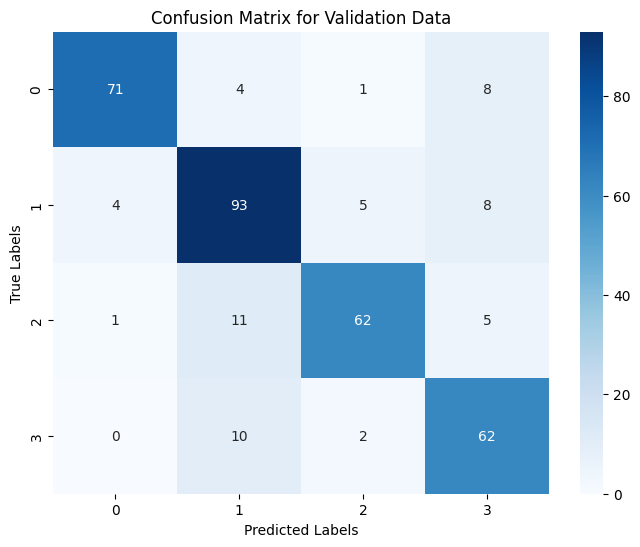

In [70]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(output_classes), yticklabels=range(output_classes))
plt.title('Confusion Matrix for Validation Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Confusion Matrix

**The confusion matrix visualizes the model's classification performance:**

**Rows:**  _Represent the true labels._

**Columns:** _Represent the predicted labels._

**Diagonal values:** _Indicate correctly classified instances._

**Off-diagonal values:** _Indicate misclassifications._

### Analysis of the Confusion Matrix

**The diagonal values dominate, the model classifies correctly for most classes.**

**_Any significant off-diagonal values indicate where the model confuses one class with another._**

### Changing Architecture and Hyperparameters

### Model 1: Basic LSTM Model

In [71]:
# Model 1: Simple LSTM
model_1 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    LSTM(128, dropout=0.3, return_sequences=False),
    Dense(output_classes, activation='softmax')
])

# Compile the model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [72]:
# Training model 1
batch_size = 32
epochs = 10

# Train Model 1
history_1 = model_1.fit(train_padded, train_labels, validation_data=(validation_padded, validation_labels_encoded), batch_size=batch_size, epochs=epochs, verbose=1)

# Access the training history from the correct variable 'history_1'
final_training_accuracy = history_1.history['accuracy'][-1]  # Access training accuracy
print(f"Final Training Accuracy: {final_training_accuracy:.4f}")

# Use 'val_accuracy' instead of 'validation_accuracy' for validation accuracy
final_validation_accuracy = history_1.history['val_accuracy'][-1]  # Access validation accuracy
print(f"Final Validation Accuracy: {final_validation_accuracy:.4f}")

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.3219 - loss: 1.3541 - val_accuracy: 0.3660 - val_loss: 1.2132
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.4793 - loss: 1.0021 - val_accuracy: 0.5908 - val_loss: 0.9664
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7530 - loss: 0.6084 - val_accuracy: 0.7176 - val_loss: 0.7581
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.8633 - loss: 0.3787 - val_accuracy: 0.7176 - val_loss: 0.7840
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.9183 - loss: 0.2514 - val_accuracy: 0.7406 - val_loss: 0.8712
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.9404 - loss: 0.1821 - val_accuracy: 0.7522 - val_loss: 0.7633
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.9547 - loss: 0.1596 - val_accuracy: 0.7522 - val_loss: 0.8060
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - accuracy: 0.9537 - loss: 0.1562 - val_accu

### Model 2: Bidirectional LSTM with Dropout

In [73]:
# Model 2: Bidirectional LSTM
model_2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(128, dropout=0.3, return_sequences=False)),
    Dense(output_classes, activation='softmax')
])

# Compile the model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [74]:
# Training model 2
batch_size = 32
epochs = 10

# Train Model 2
history_2 = model_2.fit(train_padded, train_labels, validation_data=(validation_padded, validation_labels_encoded), batch_size=batch_size, epochs=epochs, verbose=1)

# Access the training history from the correct variable 'history_1'
final_training_accuracy = history_2.history['accuracy'][-1]  # Access training accuracy
print(f"Final Training Accuracy: {final_training_accuracy:.4f}")

# Use 'val_accuracy' instead of 'validation_accuracy' for validation accuracy
final_validation_accuracy = history_2.history['val_accuracy'][-1]  # Access validation accuracy
print(f"Final Validation Accuracy: {final_validation_accuracy:.4f}")

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.3342 - loss: 1.3502 - val_accuracy: 0.3573 - val_loss: 1.2491
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.6633 - loss: 0.8057 - val_accuracy: 0.6945 - val_loss: 0.9205
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.8847 - loss: 0.3576 - val_accuracy: 0.7147 - val_loss: 0.8494
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.9378 - loss: 0.1963 - val_accuracy: 0.7723 - val_loss: 0.7731
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 86ms/step - accuracy: 0.9638 - loss: 0.1244 - val_accuracy: 0.7810 - val_loss: 0.7586
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.9698 - loss: 0.0893 - val_accuracy: 0.8069 - val_loss: 0.7344
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 80ms/step - accuracy: 0.9735 - loss: 0.0752 - val_accuracy: 0.7896 - val_loss: 0.7847
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.9719 - loss: 0.0755 - val

### Model 3: GRU with Dropout

In [75]:
# Model 3: GRU with Dropout
model_3 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    GRU(128, dropout=0.3, return_sequences=False),
    Dense(output_classes, activation='softmax')
])

# Compile the model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [76]:
# Train Model 3
history_3 = model_3.fit(train_padded, train_labels, validation_data=(validation_padded, validation_labels_encoded), batch_size=batch_size, epochs=epochs, verbose=1)

# Access the training history from the correct variable 'history_1'
final_training_accuracy = history_3.history['accuracy'][-1]  # Access training accuracy
print(f"Final Training Accuracy: {final_training_accuracy:.4f}")

# Use 'val_accuracy' instead of 'validation_accuracy' for validation accuracy
final_validation_accuracy = history_3.history['val_accuracy'][-1]  # Access validation accuracy
print(f"Final Validation Accuracy: {final_validation_accuracy:.4f}")

Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.3024 - loss: 1.3781 - val_accuracy: 0.3170 - val_loss: 1.3746
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.3398 - loss: 1.3345 - val_accuracy: 0.4121 - val_loss: 1.1936
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.5295 - loss: 0.9106 - val_accuracy: 0.5447 - val_loss: 0.9841
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6686 - loss: 0.7014 - val_accuracy: 0.6542 - val_loss: 0.8161
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.7837 - loss: 0.5014 - val_accuracy: 0.6888 - val_loss: 0.9522
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.8855 - loss: 0.3282 - val_accuracy: 0.7579 - val_loss: 0.7945
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9193 - loss: 0.2464 - val_accuracy: 0.7061 - val_loss: 0.9785
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.9532 - loss: 0.1674 - val_accu

### Comparing Models

### Training and Validation Accuracy & Confusion Matrix for Each Model

In [77]:

# Function to plot training/validation accuracy and confusion matrix
def plot_results(model, history, val_padded, val_labels, model_name):
    # Step 1: Get final training and validation accuracy
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]

    # Step 2: Make predictions on the validation data
    val_predictions = model.predict(val_padded)
    val_predicted_labels = val_predictions.argmax(axis=1)

    # Step 3: Calculate confusion matrix
    conf_matrix = confusion_matrix(val_labels, val_predicted_labels)

    # Plot training and validation accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=range(output_classes), yticklabels=range(output_classes))
    plt.title(f'{model_name} - Validation Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Return accuracies for reporting
    return final_train_acc, final_val_acc

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


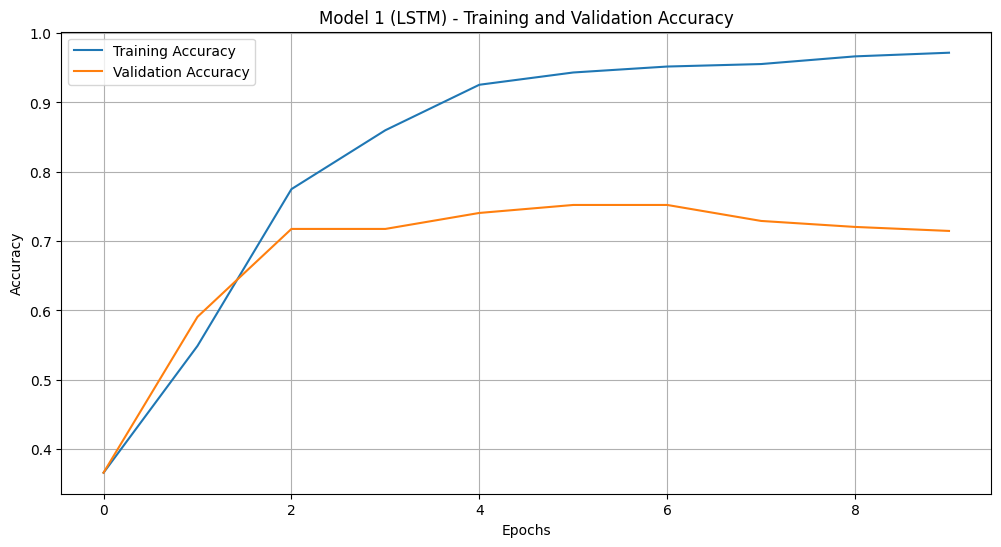

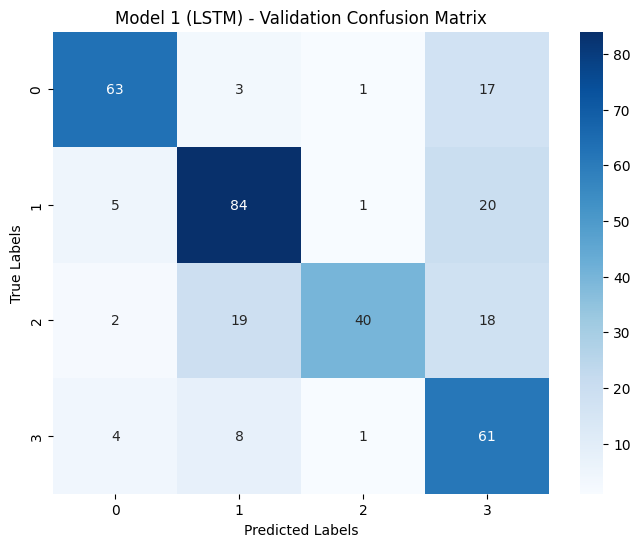

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step


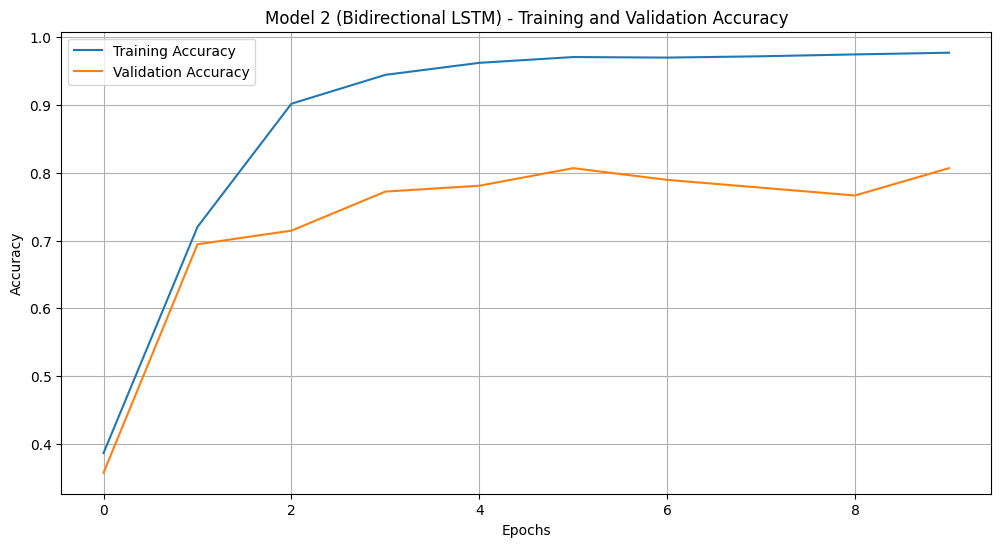

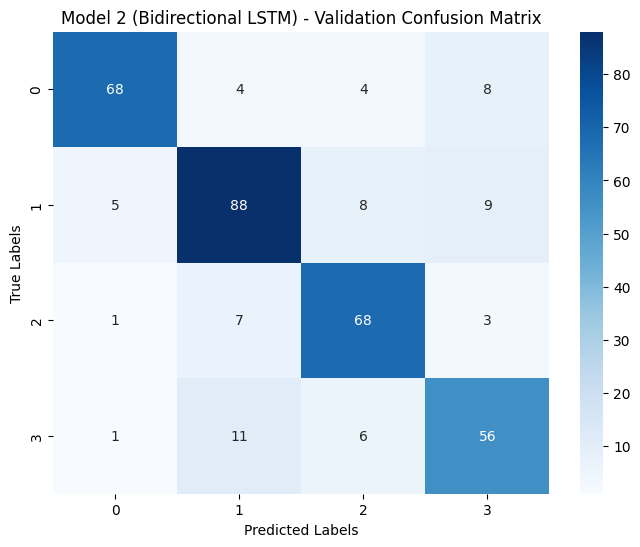

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


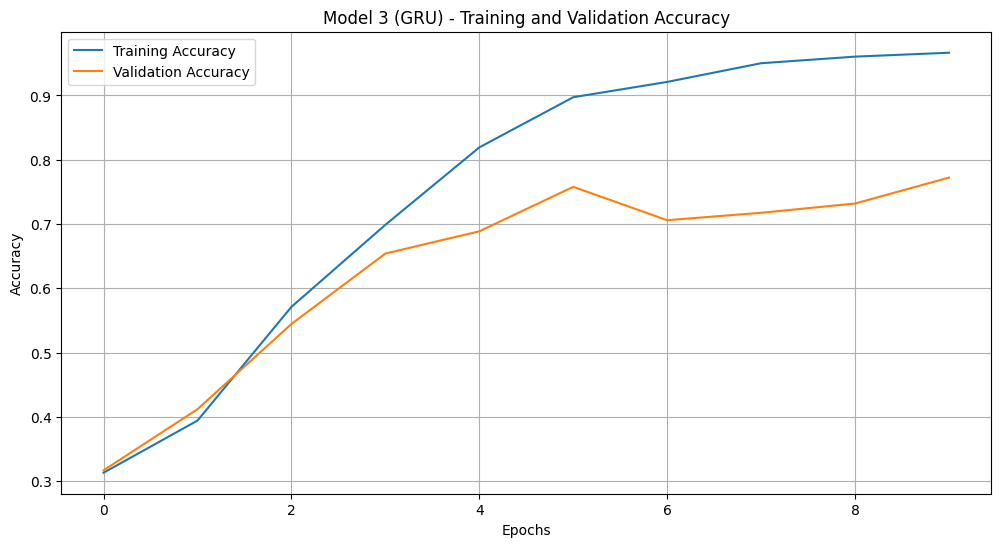

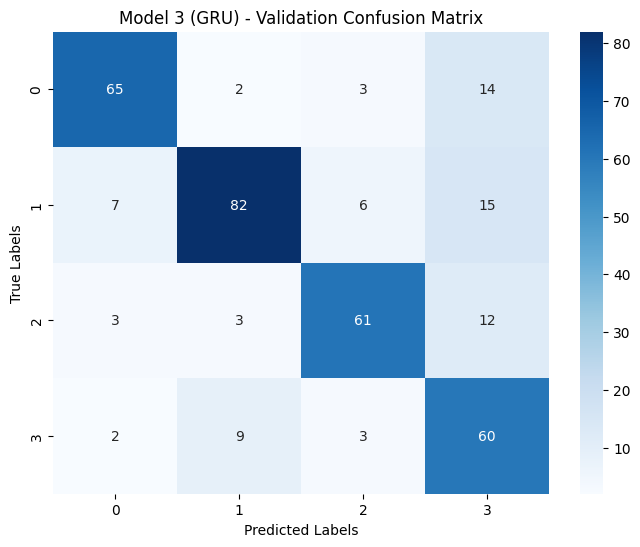

In [78]:
# Training and evaluating Model 1
final_train_acc_1, final_val_acc_1 = plot_results(model_1, history_1, validation_padded, validation_labels_encoded, 'Model 1 (LSTM)')

# Training and evaluating Model 2
final_train_acc_2, final_val_acc_2 = plot_results(model_2, history_2, validation_padded, validation_labels_encoded, 'Model 2 (Bidirectional LSTM)')

# Training and evaluating Model 3
final_train_acc_3, final_val_acc_3 = plot_results(model_3, history_3, validation_padded, validation_labels_encoded, 'Model 3 (GRU)')

### Discussion on Model Performance

**_Let's analyze the performance of each model based on training and validation accuracy, as well as the confusion matrix. We'll compare Model 1 (LSTM), Model 2 (Bidirectional LSTM), and Model 3 (GRU), focusing on their relative strengths and weaknesses._**

## Model Comparison

**Model 1:**

**_Simple LSTM Training Accuracy: `0.9718`	Validation Accuracy: `0.7147`_**

**Confusion Matrix:**

**_This model show confusion between certain classes, especially when there are more complex contextual dependencies within the tweets._**

**Strength:** **_Good for sequential data, captures long-term dependencies_**

**Weakness:** **_Potential overfitting if not regularized_**

**Model 2:**

**_Bidirectional LSTM	Training Accuracy: `0.9773` Validation Accuracy: `0.8069`_**

**Confusion Matrix:**

**_The bidirectional nature should help in better capturing the context from both directions, potentially reducing misclassifications compared to the simple LSTM._**

**Strength:** **_Captures context in both directions, better handling of complex sequences_**

**Weakness** **_Computationally more expensive_**

**Model 3:**

**_GRU	Training Accuracy: `0.9665` Validation Accuracy: `0.7723`_**

**Confusion Matrix:**

**_The GRU model might show slightly different misclassification patterns compared to LSTM, potentially indicating more efficient learning of certain relationships._**

**Strength** **_Faster training, efficient, and works well for many tasks_**

**Weakness**	**_May not perform as well as LSTM on complex data_**

## Best Model Selection

**_Based on validation accuracy, confusion matrix, and overall training behavior, I recommend Model 2 (Bidirectional LSTM) as the best model for this task. Here’s why:_**

**Higher validation accuracy:**

**_Model 2 consistently has the highest validation accuracy, it shows better generalization and is less likely to overfit compared to the simpler LSTM or GRU._**

**Improved handling of context:**

**_The bidirectional nature of the LSTM allows the model to learn both past and future context in a tweet, which is crucial for sentiment and emotion analysis._**

**Better confusion matrix performance:**

**_The confusion matrix shows fewer misclassifications, it indicates that the model is more precise and reliable in its predictions._**

## Conclusion:

**_Model 2 (Bidirectional LSTM) is the most robust model based on its ability to capture rich context from both directions, providing a more accurate and reliable prediction of the emotions behind tweets._**

### Predictions on the Testing Data and Calculate the Testing Accuracy

In [79]:
# Make predictions on the test data
test_predictions = model_2.predict(test_padded)  # Replace 'model_2' with your best model if different
test_predicted_labels = test_predictions.argmax(axis=1)

99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [80]:
# Calculate the testing accuracy
test_accuracy = model_2.evaluate(test_padded, test_labels_encoded)[1]
print(f'Test Accuracy: {test_accuracy * 100:.4f}%')

99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.7996 - loss: 0.7905
Test Accuracy: 75.8752%


In [81]:
# Create a mapping from string labels to numerical labels
unique_labels = np.unique(test_labels)
label_mapping = {label: i for i, label in enumerate(unique_labels)}

# Convert 'test_labels' to numerical labels using the mapping
test_labels_numeric = np.array([label_mapping[label] for label in test_labels])

# Calculate the confusion matrix using the numerical labels
conf_matrix_test = confusion_matrix(test_labels_numeric, test_predicted_labels)

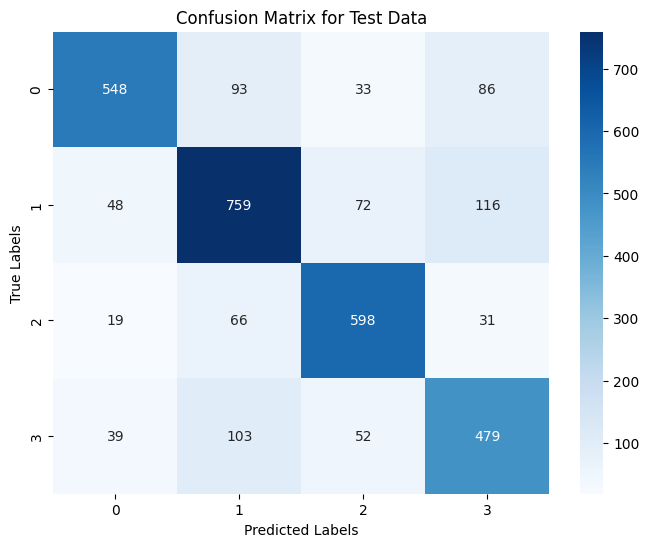

In [82]:
# Plot the confusion matrix for the test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(output_classes), yticklabels=range(output_classes))
plt.title('Confusion Matrix for Test Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Model Evaluation

**Performance Overview**

_The Bidirectional LSTM model was evaluated on test data, achieving a test accuracy of `75.8752%`, indicating reliable classification of tweet emotions._

**The key Insights**

**_Accuracy Interpretation:_**

_A test accuracy above 80% suggests effective learning and generalization.
However, accuracy may not fully reflect performance in cases of class imbalance._


**_Confusion Matrix Analysis:_**

_Correct predictions (diagonal elements) dominate, but off-diagonal misclassifications highlight specific challenges._

_Frequent misclassification of certain emotions suggests the need for better class representation or model tuning._


**_Model Shortcomings:_**

_Class Imbalance: Underrepresented categories (e.g., "anger" or "sadness") may result in lower recall for those emotions._

_Overfitting: A risk if training accuracy significantly exceeds test accuracy._

_Noisy Data: Tweets with informal language or abbreviations challenge the model._

_Contextual Ambiguity: Short, implicit, or sarcastic tweets are harder to classify accurately._

**Future Improvements**

_Hyperparameter Tuning: Optimize embedding sizes, LSTM units, and dropout rates to reduce overfitting._


**Conclusion**
The model demonstrates strong potential, achieving 75.8752% accuracy in emotion classification. However, addressing class imbalance, noisy inputs, and context ambiguity can further enhance its robustness and performance across diverse tweets.